In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ('visits.csv', sep='\t')


In [3]:
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василек
1,20180404T173913,76144fb2,15.0,Василек
2,20180403T172824,76144fb2,220.0,Василек
3,20180407T070441,76144fb2,19.0,Василек
4,20180404T132049,76144fb2,14.0,Василек


In [4]:
total_visits = data.shape[0]
('Количество заездов:', total_visits)


('Количество заездов:', 317104)

In [5]:
total_stations = len(data['id'].unique())
total_stations

471

In [6]:
data['local_time'] = (    pd.to_datetime(data['date_time'], yearfirst=True)    + pd.Timedelta(hours=3))
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

In [7]:
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')



In [8]:
station_stat = data.pivot_table(index="id", values="time_spent", aggfunc="median")
good_station_stat = good_data.pivot_table(index="id", values="time_spent", aggfunc="median")



In [9]:
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']



In [10]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)



In [11]:
good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)


In [12]:
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)







In [13]:
big_nets_stat = final_stat.query('stations > 10')


In [14]:
station_stat_full['group_name'] = (
    station_stat_full['name']
    .where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
)


In [15]:
stat_grouped = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']

In [16]:
good_data['group_name'] = (
    good_data['name']
    .where(good_data['name'].isin(big_nets_stat.index), 'Другие')
)


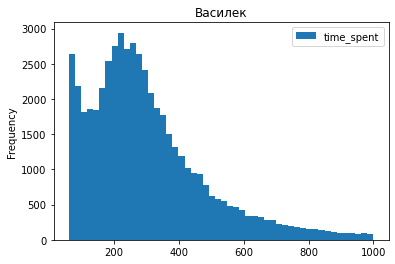

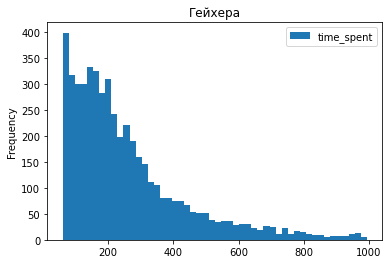

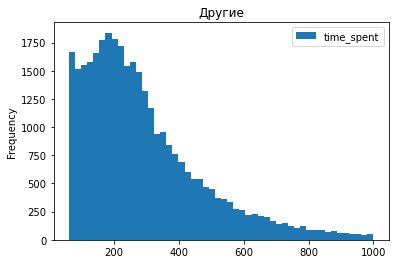

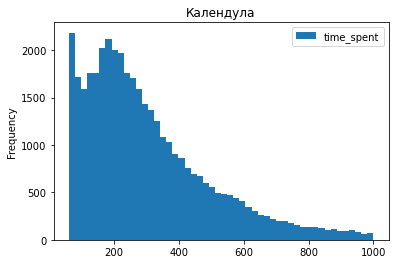

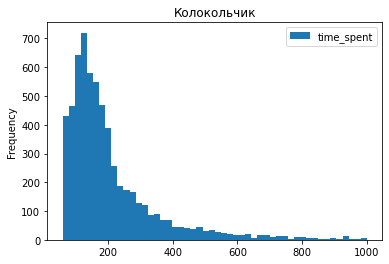

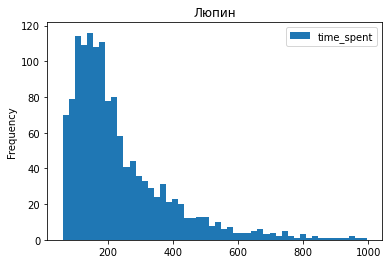

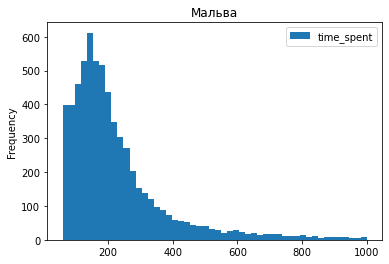

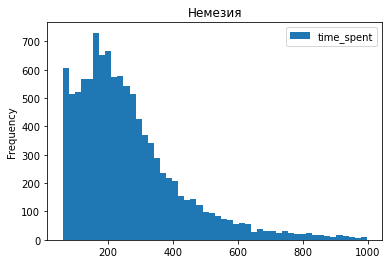

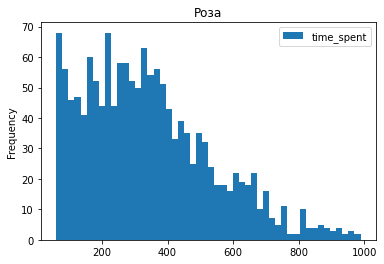

In [29]:
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(y = 'time_spent',
                    title = name,
                    kind = 'hist',
                    bins=50)
    